In [2]:
from __future__ import print_function, division
import requests
import time
from bs4 import BeautifulSoup
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import sys
from collections import defaultdict

from IPython.display import Image
%matplotlib inline
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.externals.six import StringIO
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures

In [3]:
import seaborn as sns

%matplotlib inline

from sklearn.cross_validation import train_test_split

from sklearn.linear_model import LinearRegression, Lasso, LassoCV

/Users/yanxilu/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
smaller_df = pd.read_pickle('Data Sources/Final_DataFrame')

In [5]:
X =smaller_df.loc[:,["f_to_s","intera_r","numberstudent","Citation","Salary","GDP","Endowment","Teaching","Research","International Outlook","Private","Acceptance","Diversity"]]
y = smaller_df["Overall"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
lr_model1 = LinearRegression()
lr_model1.fit(X_train,y_train)
list(zip(X_train.columns,lr_model1.coef_))

[('f_to_s', -0.10852792169083215),
 ('intera_r', -0.10852792031612048),
 ('numberstudent', 1.4146812351080307e-05),
 ('Citation', 4.2403429466690828e-06),
 ('Salary', -7.8364105098116879e-05),
 ('GDP', 8.2276298440930873e-08),
 ('Endowment', -0.35738590923621771),
 ('Teaching', 0.40765336913785866),
 ('Research', 0.36828714575180066),
 ('International Outlook', 0.12438620158093017),
 ('Private', -2.4918894480602098),
 ('Acceptance', -15.284336699264685),
 ('Diversity', -0.15316037649931047)]

In [6]:
print(lr_model1.score(X_train,y_train))
print(lr_model1.score(X_test,y_test))

0.94400746718
0.943971591515


In [7]:
#Full_model_Regression (Basic) with standardize
std = StandardScaler()
std.fit(X_train)
X_te = std.transform(X_test)
X_tr = std.transform(X_train)

lr_model2 = LinearRegression()
lr_model2.fit(X_tr,y_train)
list(zip(X_train.columns,lr_model2.coef_))

[('f_to_s', -0.7741475476274966),
 ('intera_r', -0.77414754762749283),
 ('numberstudent', 0.17106291314493527),
 ('Citation', 1.4977649122855783),
 ('Salary', -0.98436509538674777),
 ('GDP', 0.060694558443579183),
 ('Endowment', -2.4526890935373675),
 ('Teaching', 8.1537586244029132),
 ('Research', 9.505099781382528),
 ('International Outlook', 1.918808393864347),
 ('Private', -1.1606485676564833),
 ('Acceptance', -3.328469108737715),
 ('Diversity', -0.2787289244845903)]

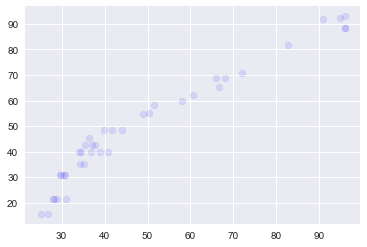

In [8]:
test_set_pred1 = lr_model1.predict(X_test)
plt.scatter(test_set_pred1,y_test,alpha=.1,color = "b")

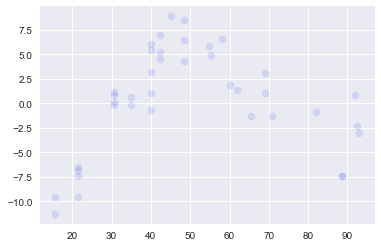

In [9]:
plt.scatter(y_test,y_test-test_set_pred1,alpha=.1,color = "b")

In [10]:
#Regularization: LASSO
lr_model3 = Lasso(alpha = 10)
selected_columns_1 = ["f_to_s","intera_r","numberstudent","Citation","Salary","GDP","Endowment","Teaching","International Outlook","Research",""]
lr_model3.fit(X_train,y_train)

Lasso(alpha=10, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [11]:
print(lr_model3.score(X_train,y_train))
print(lr_model3.score(X_test,y_test))

0.926628025365
0.924849688907


In [12]:
#Cross-Validation to tune the parameter
alphavec = 10**np.linspace(-3,9,27)
lr_model4 = LassoCV(alphas = alphavec, cv=3)
lr_model4.fit(X_train,y_train)
lr_model4.alpha_

0.20309176209047369

In [13]:
test_set_pred4 = lr_model4.predict(X_test)

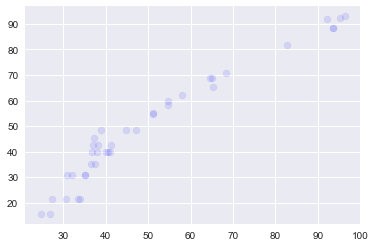

In [14]:
plt.scatter(test_set_pred4,y_test,alpha=.1,color = "b")

In [ ]:
#Residuals
plt.scatter(y_test,y_test-test_set_pred4,alpha=.1)

In [15]:
print(lr_model4.score(X_train,y_train))
print(lr_model4.score(X_test,y_test))

0.936768101453
0.943075217369


In [16]:
#Single Tree
dtrmodel1 = tree.DecisionTreeRegressor(min_samples_split=8, max_depth=4, min_samples_leaf=3)

In [17]:
dtrmodel1.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=3, min_samples_split=8,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

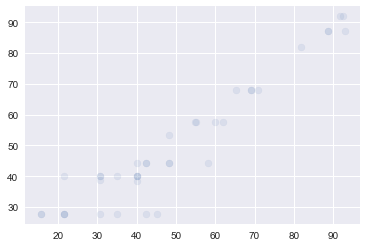

In [18]:
tree_pred_test1 = dtrmodel1.predict(X_test)
plt.scatter(y_test, tree_pred_test1,alpha=.1)

In [19]:
print(dtrmodel1.score(X_train,y_train))
print(dtrmodel1.score(X_test,y_test))

0.961573591281
0.898626704257


In [20]:
#Forest
rfmodel2 = RandomForestRegressor(n_estimators = 500, min_samples_leaf=3, max_features=4, n_jobs=-1)##?
rfmodel2.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=4, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=3, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

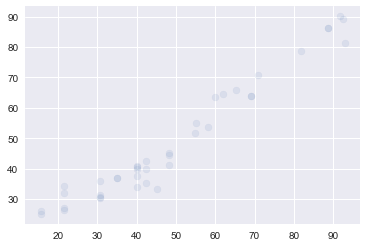

In [21]:
rf1_test_pred2 = rfmodel2.predict(X_test)
plt.scatter(y_test, rf1_test_pred2,alpha=.1)

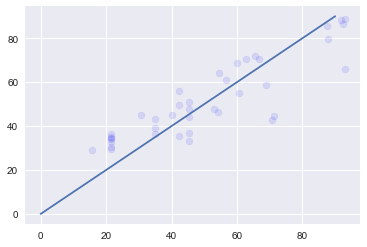

In [22]:
#Remove the three high correlation variables
#Regression Basic
X3 =smaller_df.loc[:,["f_to_s","intera_r","numberstudent","Citation","Salary","GDP","Endowment","Private","Acceptance","Diversity"]]
y3 =smaller_df["Overall"]
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X3, y3, test_size=0.3)
rfmodel3 = RandomForestRegressor(n_estimators = 500, min_samples_leaf=3, max_features=4, n_jobs=-1)
rfmodel3.fit(X_train_3,y_train_3)
rf1_test_pred3 = rfmodel3.predict(X_test_3)
plt.scatter(y_test_3, rf1_test_pred3,alpha=.1,color = "b")
plt.plot(np.linspace(0,90,20),np.linspace(0,90,20))

In [23]:
print(rfmodel3.score(X_train_3,y_train_3))
print(rfmodel3.score(X_test_3,y_test_3))

0.923869536038
0.76096136299


In [24]:
#Lasso:
alphavec = 10**np.linspace(-3,9,27)
lr_model5 = LassoCV(alphas = alphavec, cv=3)
lr_model5.fit(X_train_3,y_train_3)
lr_model5.alpha_

0.20309176209047369

In [25]:
test_set_pred5 = lr_model5.predict(X_test_3)
print(lr_model5.score(X_train_3,y_train_3))
print(lr_model5.score(X_test_3,y_test_3))

0.786070359815
0.711534020975


In [26]:
#Forest
rfmodel4 = RandomForestRegressor(n_estimators = 500, min_samples_leaf=3, max_features=4, n_jobs=-1)
rfmodel4.fit(X_train_3,y_train_3)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=4, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=3, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

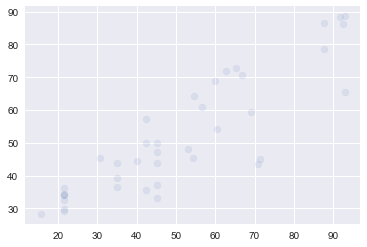

In [27]:
rf1_test_pred4 = rfmodel4.predict(X_test_3)
plt.scatter(y_test_3, rf1_test_pred4,alpha=.1)

In [28]:
print(rfmodel4.score(X_train_3,y_train_3))
print(rfmodel4.score(X_test_3,y_test_3))

0.923849382762
0.759541679734


In [29]:
#Gradient boosting
from sklearn.ensemble import GradientBoostingRegressor
gbmodel5 = GradientBoostingRegressor(n_estimators=2000, learning_rate=0.005, max_depth=3, subsample=.2)
gbmodel5.fit(X_train_3, y_train_3)
y_pred_gb1 = gbmodel5.predict(X_test_3)
np.sqrt(np.mean((y_pred_gb1 - y_test_3)**2))
list(zip(X_train_3.columns, gbmodel5.feature_importances_))

[('f_to_s', 0.071225186890262804),
 ('intera_r', 0.071482209556356674),
 ('numberstudent', 0.14081539614737951),
 ('Citation', 0.21620541586401981),
 ('Salary', 0.13301658109319711),
 ('GDP', 0.139523867694899),
 ('Endowment', 0.0772389431819651),
 ('Private', 0.0053188210699769258),
 ('Acceptance', 0.091166524572715041),
 ('Diversity', 0.054007053929227687)]

In [30]:
print(gbmodel5.score(X_train_3, y_train_3))
print(gbmodel5.score(X_test_3,y_test_3))

0.976789259122
0.785176214921


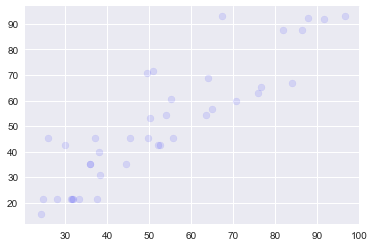

In [31]:
plt.scatter(y_pred_gb1,y_test_3,alpha=.1,color = "b")